In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import cv2, os, glob, random
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Activation,Conv2D, MaxPooling2D,AveragePooling2D,Flatten,Dropout,BatchNormalization


Using TensorFlow backend.


In [15]:
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("test/0/8226970.jpg")
#img = cv2.resize(img, (224,224))
print(img.shape)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
train_data_dir = 'train'
validation_data_dir = 'test'

epochs = 10
batch_size = 4

img_width, img_height = 512, 64
input_shape = (img_height, img_width,1)
num_classes = 10

nb_train_samples = 0
for c in range(0,42):
    class_dir = os.path.join(train_data_dir,str(c))
    all_files = glob.glob(class_dir+"/*.jpg")
    for j, full_path in enumerate(all_files):
        nb_train_samples += 1


nb_validation_samples = 0
for c in range(0,42):
    class_dir = os.path.join(validation_data_dir,str(c))
    all_files = glob.glob(class_dir+"/*.jpg")
    for j, full_path in enumerate(all_files):
        nb_validation_samples += 1



train_datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.1,
    #zoom_range=0.1,
    #height_shift_range=0.1,
    #width_shift_range=0.1,
    #rotation_range=10,
    #horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                 #horizontal_flip=True
                                 )

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    color_mode = "grayscale",
    #color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
     validation_data_dir,
    target_size=(img_height,img_width),
    color_mode = "grayscale",
    #color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical')

filepath="weights/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False)
callbacks_list = [checkpoint]




Found 7569 images belonging to 10 classes.
Found 1340 images belonging to 10 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 510, 32)       320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 508, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 254, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 254, 64)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 487680)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               62423168  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [ ]:
# model = keras.applications.mobilenet.MobileNet(include_top=True, input_shape = (img_height,img_width,1), weights=None,classes = num_classes)
model = keras.applications.xception.Xception(include_top=True, input_shape = (img_height,img_width,3), weights=None,classes = num_classes)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

In [5]:
epochs = 10
#model = keras.applications.mobilenet.MobileNet(include_top=True, input_shape = (img_height,img_width,1), weights=None,classes = num_classes)
#model.compile(loss=keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs, validation_data = validation_generator,validation_steps=nb_validation_samples // batch_size,shuffle=True,callbacks=callbacks_list,verbose=1)

Epoch 1/10
1892/1892 [==============================] - 481s 254ms/step - loss: 2.3199 - acc: 0.1272 - val_loss: 2.2281 - val_acc: 0.1664

Epoch 00001: saving model to weights/weights-improvement-01-0.17.hdf5
Epoch 2/10
1892/1892 [==============================] - 476s 251ms/step - loss: 2.1540 - acc: 0.2001 - val_loss: 2.0832 - val_acc: 0.1970

Epoch 00002: saving model to weights/weights-improvement-02-0.20.hdf5
Epoch 3/10
1892/1892 [==============================] - 471s 249ms/step - loss: 1.8434 - acc: 0.3451 - val_loss: 2.1032 - val_acc: 0.1888

Epoch 00003: saving model to weights/weights-improvement-03-0.19.hdf5
Epoch 4/10
1892/1892 [==============================] - 471s 249ms/step - loss: 1.2392 - acc: 0.5959 - val_loss: 2.0434 - val_acc: 0.2388

Epoch 00004: saving model to weights/weights-improvement-04-0.24.hdf5
Epoch 5/10
1892/1892 [==============================] - 471s 249ms/step - loss: 0.6095 - acc: 0.8126 - val_loss: 2.2145 - val_acc: 0.2418

Epoch 00005: saving model

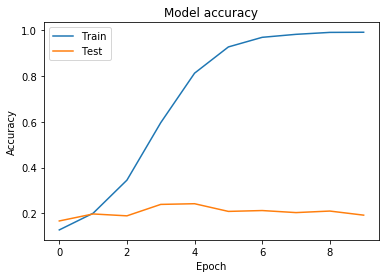

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

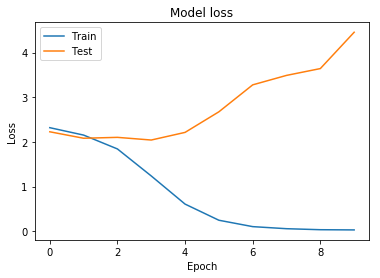

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
num_classes

10

In [18]:
model = keras.applications.mobilenet.MobileNet(include_top=True, input_shape = (img_height,img_width,1), weights=None,classes = num_classes)
# model = keras.applications.xception.Xception(include_top=True, input_shape = (img_height,img_width,3), weights=None,classes = num_classes)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
# model.summary()
epochs = 10
#model = keras.applications.mobilenet.MobileNet(include_top=True, input_shape = (img_height,img_width,1), weights=None,classes = num_classes)
#model.compile(loss=keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs, validation_data = validation_generator,validation_steps=nb_validation_samples // batch_size,shuffle=True,callbacks=callbacks_list,verbose=1)

Epoch 1/10
1892/1892 [==============================] - 204s 108ms/step - loss: 1.8535 - acc: 0.3071 - val_loss: 3.6490 - val_acc: 0.2754

Epoch 00001: saving model to weights/weights-improvement-01-0.28.hdf5
Epoch 2/10
1892/1892 [==============================] - 198s 104ms/step - loss: 0.8583 - acc: 0.7106 - val_loss: 11.3146 - val_acc: 0.1015

Epoch 00002: saving model to weights/weights-improvement-02-0.10.hdf5
Epoch 3/10
1892/1892 [==============================] - 212s 112ms/step - loss: 0.4458 - acc: 0.8574 - val_loss: 11.2688 - val_acc: 0.0963

Epoch 00003: saving model to weights/weights-improvement-03-0.10.hdf5
Epoch 4/10
1892/1892 [==============================] - 194s 103ms/step - loss: 0.3154 - acc: 0.9027 - val_loss: 10.4801 - val_acc: 0.08433170 - acc: 0.902 - ETA: 9s - ETA: 6s - loss: 0.3182 - ETA: 5s - loss: 0.3178 

Epoch 00004: saving model to weights/weights-improvement-04-0.08.hdf5
Epoch 5/10
1892/1892 [==============================] - 192s 101ms/step - loss: 0.2

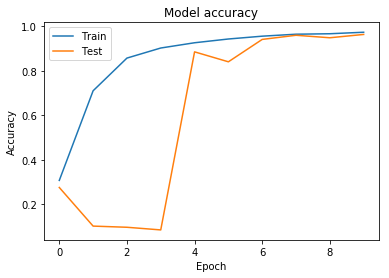

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

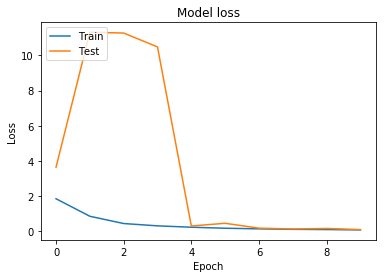

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
model = keras.applications.mobilenet.MobileNet(include_top=True, input_shape = (img_height,img_width,1), weights=None,classes = num_classes)
# model = keras.applications.xception.Xception(include_top=True, input_shape = (img_height,img_width,3), weights=None,classes = num_classes)
adadelta = keras.optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
# model.summary()
epochs = 10
#model = keras.applications.mobilenet.MobileNet(include_top=True, input_shape = (img_height,img_width,1), weights=None,classes = num_classes)
#model.compile(loss=keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs, validation_data = validation_generator,validation_steps=nb_validation_samples // batch_size,shuffle=True,callbacks=callbacks_list,verbose=1)

Epoch 1/10
1892/1892 [==============================] - 198s 104ms/step - loss: 1.8876 - acc: 0.2833 - val_loss: 11.7042 - val_acc: 0.1045

Epoch 00001: saving model to weights/weights-improvement-01-0.10.hdf5
Epoch 2/10
1892/1892 [==============================] - 190s 101ms/step - loss: 0.9869 - acc: 0.6557 - val_loss: 3.2385 - val_acc: 0.5321

Epoch 00002: saving model to weights/weights-improvement-02-0.53.hdf5
Epoch 3/10
1892/1892 [==============================] - 191s 101ms/step - loss: 0.5283 - acc: 0.8280 - val_loss: 0.3522 - val_acc: 0.8828

Epoch 00003: saving model to weights/weights-improvement-03-0.88.hdf5
Epoch 4/10
1892/1892 [==============================] - 191s 101ms/step - loss: 0.3495 - acc: 0.8927 - val_loss: 0.6863 - val_acc: 0.7881

Epoch 00004: saving model to weights/weights-improvement-04-0.79.hdf5
Epoch 5/10
1892/1892 [==============================] - 191s 101ms/step - loss: 0.2636 - acc: 0.9162 - val_loss: 3.7251 - val_acc: 0.5470

Epoch 00005: saving mode

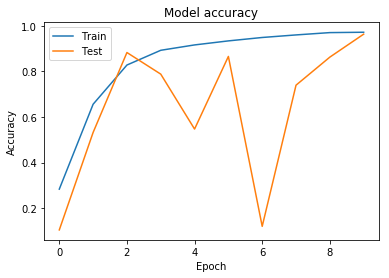

In [48]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

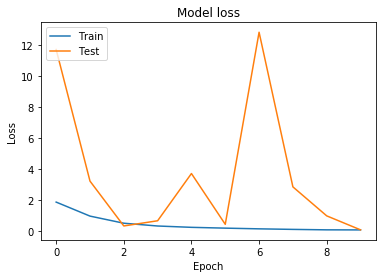

In [49]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = load_model('model_v3.h5')

In [22]:
(img_height,img_width,1)

(64, 512, 1)

In [46]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    th = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    
    rrec = cv2.rectangle(frame,(100,100),(612,164),(255,255,255,5))
    
    # Display the resulting frame
   # cv2.imshow('frame',gray)

    #rrec_frame = ('rrec',gray_rrec)
    
    
    crop_cap = th[100:164,100:612]
    text = recognition(crop_cap)
    cv2.putText(rrec,text,(50,50), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),1,cv2.LINE_AA)
    cv2.imshow('test_image',rrec)
    cv2.imshow('crop_image',crop_cap)
    
    #print(resized_img.shape)
   
    #img_path = cap

    #img = 
    #img = img.reshape(1,28,28,1)
    #img = img.astype('float32')
    #img /= 255
    
    #preds = model.predict(img)

    #labels = [0,1,2,3,4,5,6,7,8,9]
    #ind = preds[0].argmax()
    #print("Ответ : ",labels[ind], ", точность :", round(preds[0][ind]*100,2),"%" )
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
    

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [43]:
def recognition(img):
    # resized_img = cv2.resize(img, (28, 28)) 
    resized_img = img.copy()
    img = resized_img.reshape(1,64,512,1)
    img = img.astype('float32')
    img /= 255
    preds = model.predict(img)
    labels = [0,1,2,3,4,5,6,7,8,9]
    ind = preds[0].argmax()
    #print("Ответ : ",labels[ind], ", точность :", round(preds[0][ind]*100,2),"%" )
    acc = round(preds[0][ind]*100,2)
    if acc > 75:
        res = ""+str(labels[ind])+", "+str(acc) +"%"
    else:
        res= "0, 0%"
    return res

In [34]:
img = cv2.imread("8.jpg",0)
recognition(img)

'8, 99.95%'

In [ ]:
import glob, os, cv2
import random

In [ ]:
# чтение из оригинального датасета и сохранение по классам с рандомными именами
for full_path in glob.glob("2019_dataset/*.jpg"):
    file = os.path.basename(full_path)
    c = file[:file.index('_')]
    img = cv2.imread(full_path,0)
    directory = "classes/"+c+"/"
    if not os.path.exists(directory):
        os.makedirs(directory)
    cv2.imwrite(directory+str(random.randint(100000,999999))+".jpg",img)

In [ ]:
# чтение из разделенного датасета по классам и разделение на train И test
test = 0.2
for c in range(0,42):
    class_dir = os.path.join("classes",str(c))
    all_files = glob.glob(class_dir+"/*.jpg")
    train_number = int(len(all_files)*(1-test))
    for j, full_path in enumerate(all_files):
        file = os.path.basename(full_path)
        img = cv2.imread(full_path,0)
        if j<=train_number:
            directory = "train/"+str(c)+"/"
        else:
            directory = "test/"+str(c)+"/"
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(directory+file,img)

In [ ]:
import cv2
import numpy as np
import os, glob

In [ ]:
img = cv2.imread("test/0/831580.jpg",0)
img.shape

In [ ]:
#img = cv2.imread("test/0/831580.jpg",0)
def preproc_img(img):
    img = cv2.resize(img, (730, 100)) 
    #th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    hist = np.average(th,axis=0)
    rb = img.shape[1]
    for i in range(len(hist)-1, 3, -1):
        h=hist[i]
        if hist[i]>252 or hist[i-1]>252 or hist[i-2]>252 :
            rb = i
        else:
            break
    crop_img = th[:,:rb]
    new_img = np.ones((730,730),dtype=np.uint8)*255
    H,W = new_img.shape
    h,w = crop_img.shape
    #print(H,W,h,w)
    new_img[int((H-h)/2):int((H-h)/2)+h,int((W-w)/2):int((W-w)/2)+w] = crop_img
    #cv2.imwrite("new_img.jpg",new_img)
    return new_img

#img = cv2.imread("test/0/831580.jpg",0)
def preproc_img2(img):
    img = cv2.resize(img, (730, 100)) 
    #th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    th = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    hist = np.average(th,axis=0)
    rb = img.shape[1]
    lb = 0
    for i in range(len(hist)-1, 3, -1):
        if hist[i]>252 or hist[i-1]>252 or hist[i-2]>252 :
            rb = i
        else:
            break
    for i in range(0, len(hist)-3):
        if hist[i]>252 or hist[i+1]>252 or hist[i+2]>252 :
            lb = i
        else:
            break
    crop_img = img[:,lb:rb,:]
    new_img = cv2.resize(crop_img, (256,256))
    return new_img

In [ ]:
cv2.imshow("a",th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
# чтение из train И test, сохранение в train2,test2 (квадратные картинки)
dataset = "train"
for c in range(0,42):
    class_dir = os.path.join(dataset,str(c))
    all_files = glob.glob(class_dir+"/*.jpg")
    for j, full_path in enumerate(all_files):
        file = os.path.basename(full_path)
        img = cv2.imread(full_path)
        new_img = preproc_img2(img)
        # cv2.imshow("test",new_img)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # break
        directory = dataset+"3/"+str(c)+"/"
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(directory+file,new_img)